# Link collab notebook to drive

In [1]:
#mount google drive
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Load packages and data

In [44]:
!pip install bokeh

    100% |████████████████████████████████| 133kB 3.2MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
df_raw = pd.read_csv('gdrive/Team Drives/ECE 143/athlete_events.csv')
df_noc = pd.read_csv('gdrive/Team Drives/ECE 143/noc_regions.csv')  # Region abbreviations

In [145]:
athlete_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Clean data

## Choosing the best events to analyze

In [0]:
# Only consider data after 1975
df = df_raw.loc[df.Year>1975]

In [0]:
events = np.unique(df.Event)
num_medals = [df.loc[df.Event==e].Medal.notnull().sum() /
              df.loc[df.Event==e].Medal.size for e in events]  # find number of medals in each event
event_medals = dict(zip(events, num_medals))  # combine
sorted_event_medals = [[e,event_medals[e]] for e in sorted(event_medals, key=event_medals.get, reverse=True)]  # sort by medals

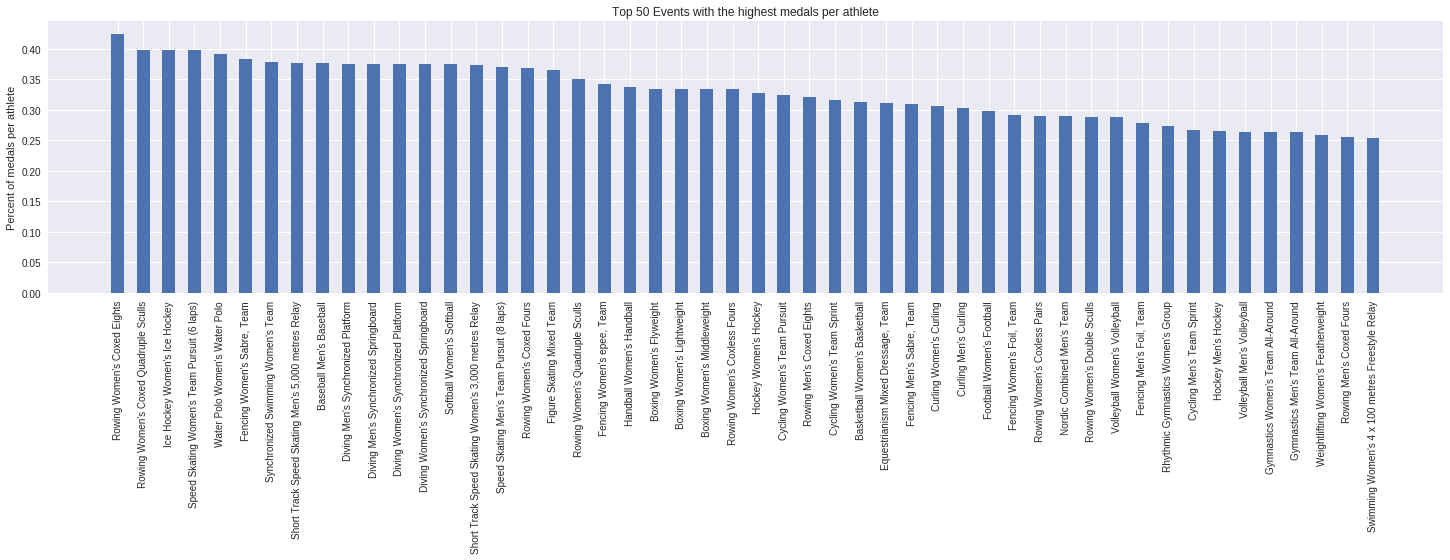

In [248]:
#@title Top Events 
number = 50 #@param {type:"slider", min:1, max:100, step:1}
# Plot events vs medal count
plt.figure(figsize=(25,5))
num_plot = number
plt.bar(range(num_plot), [e[1] for e in sorted_event_medals[:num_plot]], align='center', width=0.5)
plt.xticks(range(num_plot), [e[0] for e in sorted_event_medals[:num_plot]], rotation='vertical')
plt.title('Top {} Events with the highest medals per athlete'.format(num_plot))
plt.ylabel('Percent of medals per athlete')
plt.show()

Based on the bar graph, we chose **water polo, baseball, synchronized diving, ...** to conduct our analysis with because they are events with the highest medal count per athlete and are relatively popular.

## Remove nans

In [0]:
# Remove rows with NaNs EXCEPT medal column


## Extracting athletes with medals

In [0]:
# Split data with medal winners with non-medal athletes


# Visualize data

In [242]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
# from bokeh.plotting import figure, show

def make_tab(title, data):
    """ Makes a bokeh tab of a plot of data """
    hist, edges = np.histogram(np.array(data), range=(data.min(), data.max()), bins=50)
    source = ColumnDataSource( data = dict( data_value = hist ) )
    p = figure(title=title, background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.y_range.start = 0
    p.xaxis.axis_label = title
    p.yaxis.axis_label = 'Count'
        
    tab = Panel(child=p, title=title)
    return tab

# Create tabs
tabAge = make_tab("Age", df.Age)
tabHeight = make_tab("Height (cm)", df.Height)
tabWeight = make_tab("Weight (kg)", df.Weight)
# Combine tabs
tabs = Tabs(tabs=[tabAge, tabHeight, tabWeight])
# Display
output_notebook()
show(tabs)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Loading BokehJS ...

# Analyze Data